# Identifying Common Stress Entitites from MED-DL Extractions

**Purpose**: This notebook is dedicated to examining the medical entities extracted using the MED-DL tool. The primary objective is to identify common mentions of stress in the dataset.

**Description**: 
- The notebook begins by reviewing the entities extracted from MED-DL.
- Utilizes visualization techniques to identify and select common stress mentions.
- Adheres to the methodology described in the paper: Šćepanović, S., Constantinides, M., Quercia, D. et al. "Quantifying the impact of positive stress on companies from online employee reviews." Sci Rep 13, 1603 (2023). [Link to the paper](https://doi.org/10.1038/s41598-022-26796-6). This paper provides a structured approach to identifying stress entities from online reviews.

In [1]:
import os
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 1. Data Loading

In [2]:
# Specify the path to the JSON file containing the extracted medical entities
path = os.path.join("d:/", "Research Project", "Data")
fname = "medical_entities.json"
fpath = os.path.join(path, fname)

In [3]:
# Load the JSON file into a Pandas Series object
data = pd.read_json(fpath, typ="series")

# Convert the series to a DataFrame
df = data.reset_index()
df.columns = ["entity", "count"]

## 2. Intial Data Exploration

In [4]:
df.shape

(21415, 2)

In [5]:
df.head()

,entity,count
0,stress,4464
1,pressure,1905
2,pains,1765
3,cts,1160
4,high stress,889


In [6]:
# How many medical entities have we identified using MED-DL?
df["count"].sum()

109393

In [7]:
# Drop any entities that have only 1 occurence
df = df[df["count"] > 1]

# How many are they left?
df.shape

(6759, 2)

### 2.1. Word Cloud Visualization

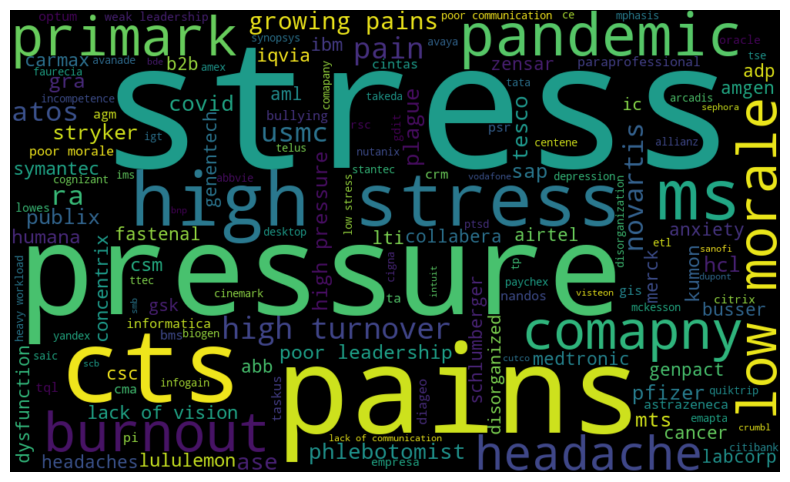

In [8]:
# Convert the processed DataFrame into a dictionary for word cloud generation
word_freq = df.set_index("entity")["count"].head(150).to_dict()

# Generate and display the word cloud
wordcloud = WordCloud(width=1000, height=600).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.2. Bar Chart Visualization

In [9]:
# Plots a bar chart of words ranked between "start" and "end".
def plot_top_words(df, start, end,):
    # Extract the specified range from the sorted dataframe
    df_range = df.iloc[start:end]
    
    # Plot the bar chart
    plt.figure(figsize=(15,10))
    plt.barh(df_range["entity"], df_range["count"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.yticks(weight='bold', fontsize=12)

    
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.title(f"Words ranked {start + 1} to {end}")
    plt.show()

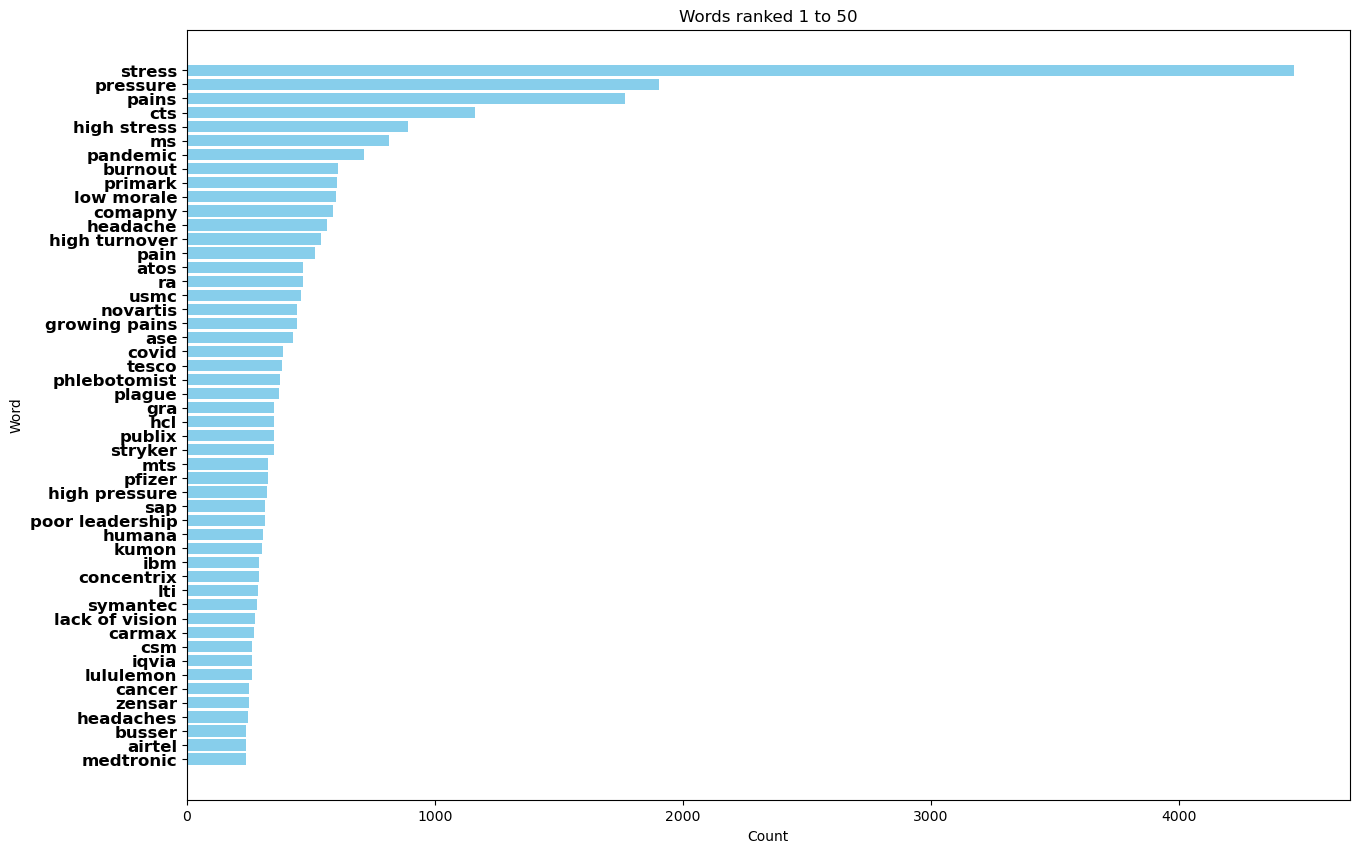

In [10]:
plot_top_words(df, 0, 50)

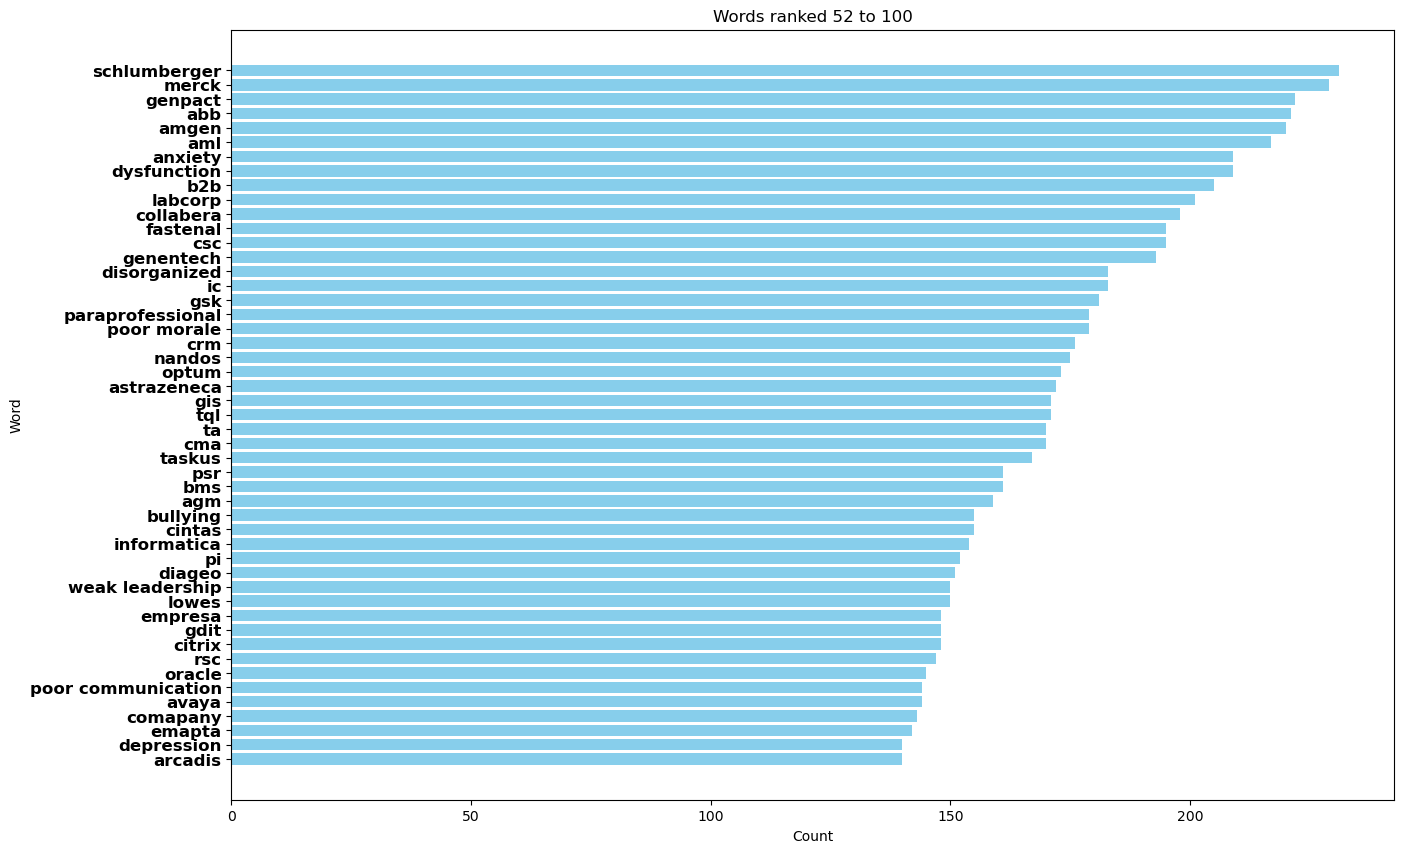

In [11]:
plot_top_words(df, 51, 100)

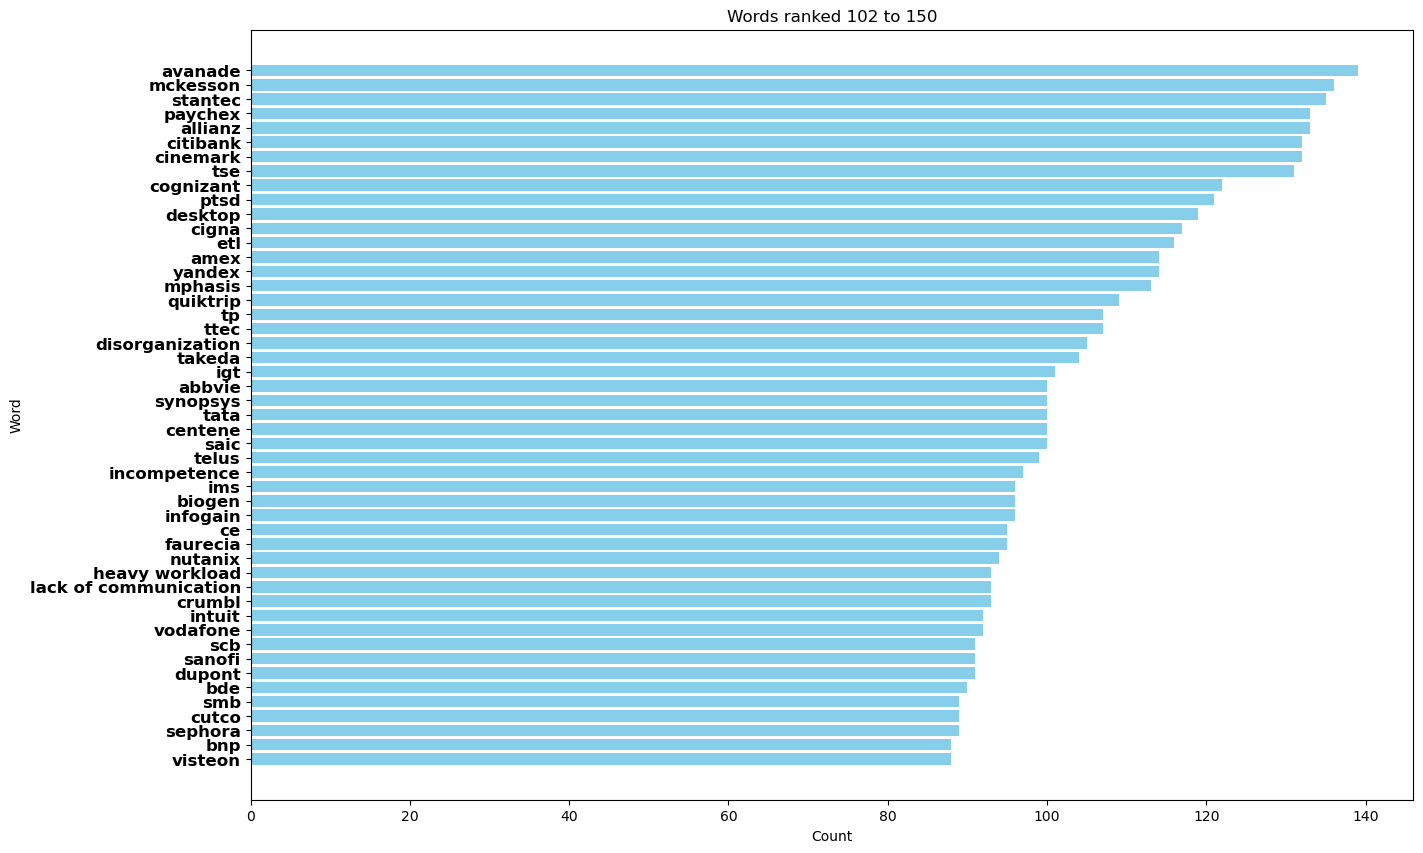

In [12]:
plot_top_words(df, 101, 150)

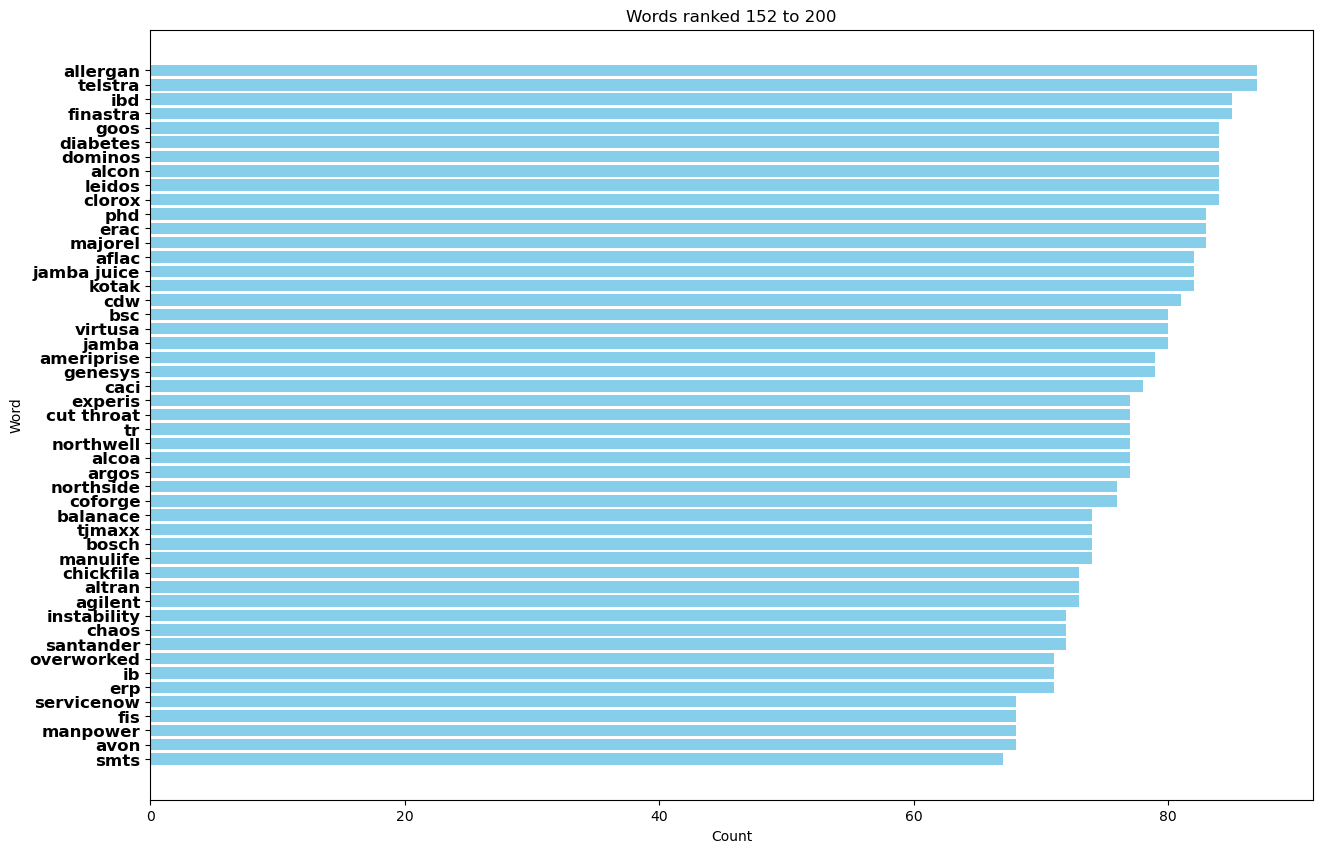

In [13]:
plot_top_words(df, 151, 200)

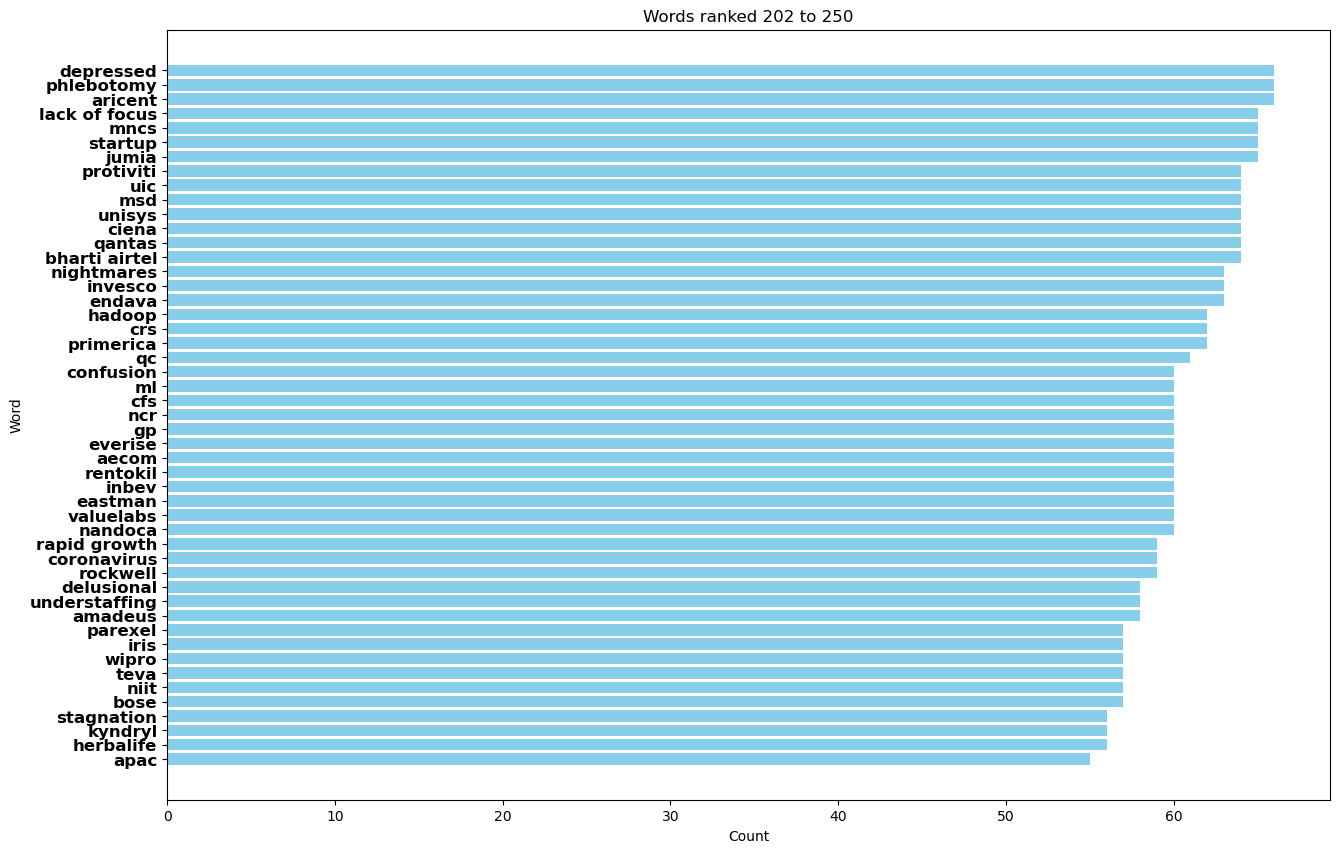

In [14]:
plot_top_words(df, 201, 250)

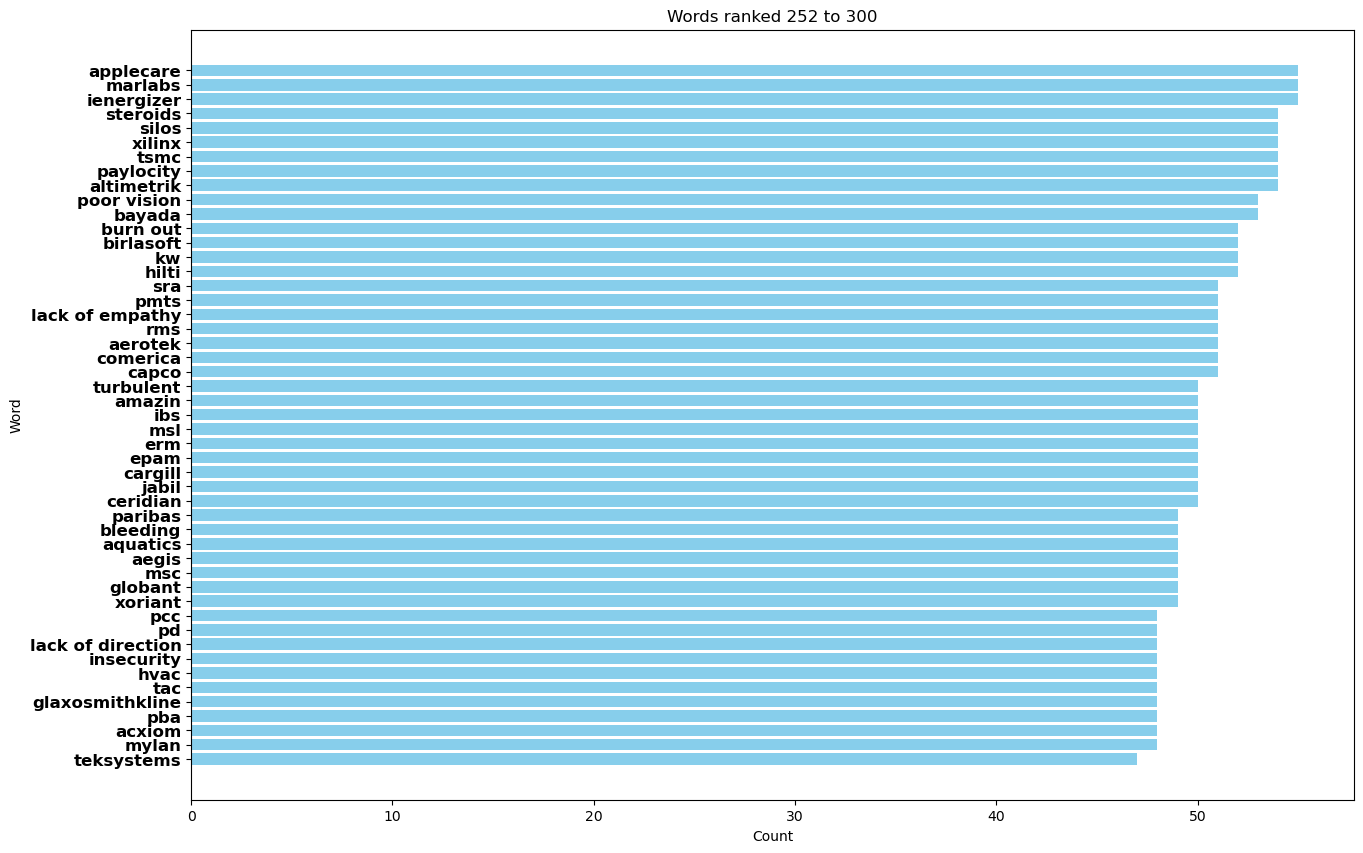

In [15]:
plot_top_words(df, 251, 300)

## 3. Manual Selection of Stress Indicators

### 3.1. Literature-Based Search

Manually search for words identified in the literature as stress indicators and check their frequency in the dataset.

In [16]:
literature_stress_indicators = [
    "stress", "high stress", "ressure", "burnout", "understaffing", "heavy workload", 
    "exhaustion", "stress levels", "overworked", "tension", "high workload", "extreme stress",
    "mental stress", "overload", "pressure to perform"
]

In [17]:
df[df["entity"].isin(literature_stress_indicators)]

,entity,count
0,stress,4464
4,high stress,889
7,burnout,610
136,heavy workload,93
192,overworked,71
238,understaffing,58
341,exhaustion,42
487,high workload,31
588,tension,26
682,extreme stress,22


### 3.2. Selection from Visualized Data

From the visualized data in step 2, manually select conditions that reflect workplace stress. This approach adheres to the methodology described in ther eferenced literature.


In [18]:
visualized_stress_indicators = [
    "stress", "high stress", "low stress", "burnout", "anxiety",
    "depression", "headache", "headaches", "pain", "pains", "low morale",
    "poor morale", "pressure", "dysfunction", "bullying", "overworked", 
    "heavy workload"
]

len(visualized_stress_indicators)

17

In [19]:
df[df["entity"].isin(visualized_stress_indicators)]

,entity,count
0,stress,4464
1,pressure,1905
2,pains,1765
4,high stress,889
7,burnout,610
9,low morale,599
11,headache,565
13,pain,517
46,headaches,245
57,anxiety,209


In [20]:
# How many reviews does MED-DL identified with these entities?
df[df["entity"].isin(visualized_stress_indicators)]["count"].sum()

12754

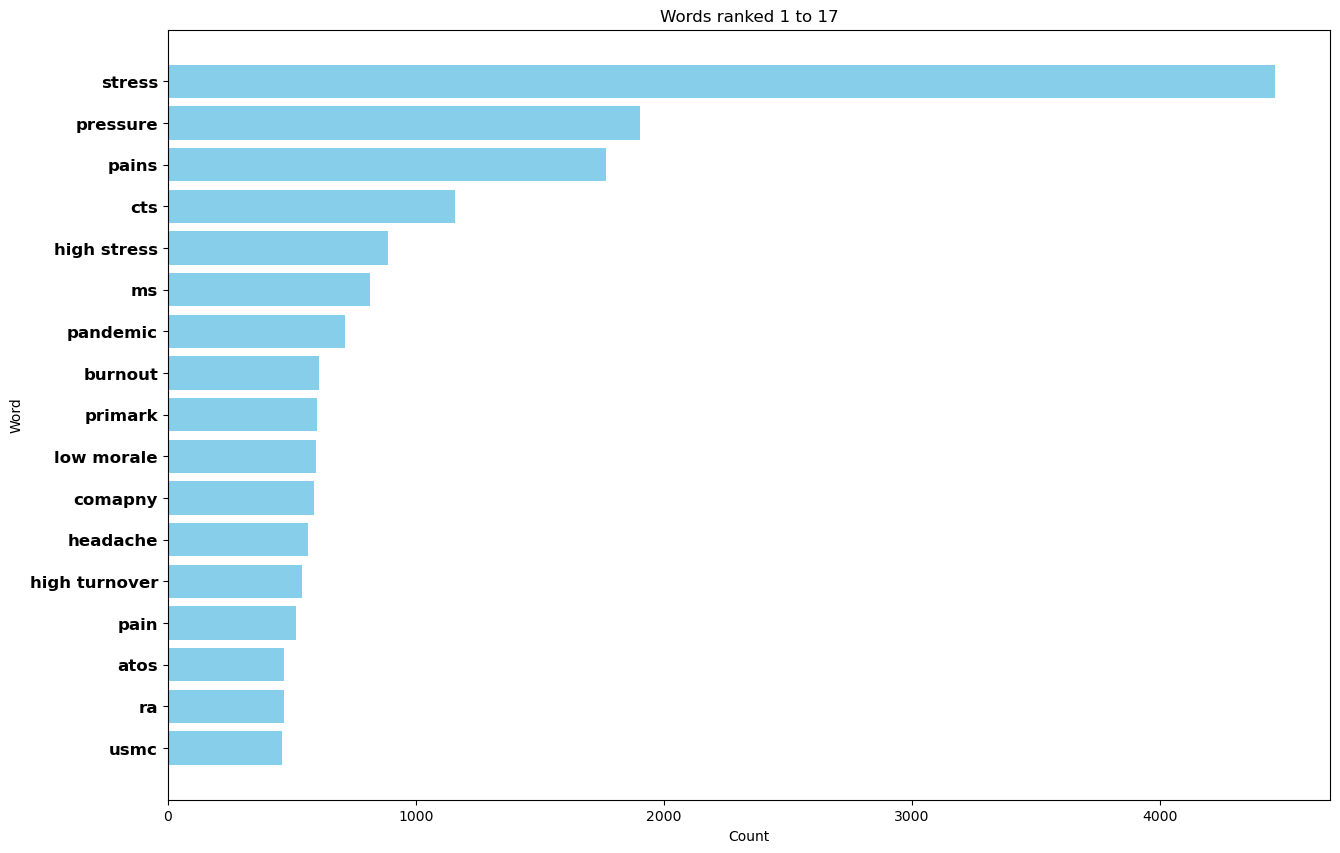

In [21]:
plot_top_words(df, 0, 17)

### 4. Saving Identified Stress Indicators

In [22]:
fname = "stress_entities.txt"
fpath = os.path.join(path, fname)

with open(fpath, "w") as file:
    file.write(str(visualized_stress_indicators))